<a href="https://colab.research.google.com/github/rubbims/introgeodf/blob/main/introgeodfs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Geodataframes**

In [291]:
#importing useful libraries
import requests
import geopandas as gpd
import pandas as pd

In [292]:
# World cities folder
base_worldcities = 'https://github.com/rubbims/introgeodf/raw/main/World_Cities/'
# list of useful components
file_worldcities = ['World_Cities.shp', 'World_Cities.shx', 'World_Cities.dbf']
# Downloading files
for file_worldcities in file_worldcities:
    url_worldcities = base_worldcities + file_worldcities
    response_worldcities = requests.get(url_worldcities)
    with open(file_worldcities, 'wb') as file:
        file.write(response_worldcities.content)
# Read the shapefile using geopandas
cities = gpd.read_file('World_Cities.shp')

In [293]:
# World countries folder
base_worldcountries = 'https://github.com/rubbims/introgeodf/raw/main/World_Countries/'
# list of useful components
file_worldcountries = ['World_Countries.shp', 'World_Countries.shx', 'World_Countries.dbf']
# Downloading files
for file_worldcountries in file_worldcountries:
    url_worldcountries = base_worldcountries + file_worldcountries
    response_worldcountries = requests.get(url_worldcountries)
    with open(file_worldcountries, 'wb') as file:
        file.write(response_worldcountries.content)
# Read the shapefile using geopandas
countries = gpd.read_file('World_Countries.shp')

In [294]:
# World hydrography folder
base_worldhydro = 'https://github.com/rubbims/introgeodf/raw/main/World_Hydrography/'
# list of useful components
file_worldhydro = ['World_Hydrography.shp', 'World_Hydrography.shx', 'World_Hydrography.dbf']
# Downloading files
for file_worldhydro in file_worldhydro:
    url_worldhydro = base_worldhydro + file_worldhydro
    response_worldhydro = requests.get(url_worldhydro)
    with open(file_worldhydro, 'wb') as file:
        file.write(response_worldhydro.content)
# Read the shapefile using geopandas
hydro = gpd.read_file('World_Hydrography.shp')

In [295]:
#practicing dfs functions
maps=[cities,countries,hydro]
#type of dfs
for index, map_component in enumerate(maps):
    print(f'The type of maps[{index}] is {type(map_component)}')
#dimension of dfs
for index, map_component in enumerate(maps):
    print(f'The shape of maps[{index}] is {map_component.shape}')
#name of columns
for index, map_component in enumerate(maps):
    print(f'The column names of maps[{index}] is {map_component.columns}')

The type of maps[0] is <class 'geopandas.geodataframe.GeoDataFrame'>
The type of maps[1] is <class 'geopandas.geodataframe.GeoDataFrame'>
The type of maps[2] is <class 'geopandas.geodataframe.GeoDataFrame'>
The shape of maps[0] is (610, 4)
The shape of maps[1] is (252, 2)
The shape of maps[2] is (98, 3)
The column names of maps[0] is Index(['NAME', 'COUNTRY', 'CAPITAL', 'geometry'], dtype='object')
The column names of maps[1] is Index(['COUNTRY', 'geometry'], dtype='object')
The column names of maps[2] is Index(['NAME', 'SYSTEM', 'geometry'], dtype='object')


In [296]:
#some few rows
for index, map_component in enumerate(maps):
    print(f'The column names of maps[{index}] is {map_component.head}')

The column names of maps[0] is <bound method NDFrame.head of                  NAME      COUNTRY CAPITAL                    geometry
0            Murmansk       Russia       N   POINT (33.08604 68.96355)
1         Arkhangelsk       Russia       N   POINT (40.64616 64.52067)
2    Saint Petersburg       Russia       N   POINT (30.45333 59.95189)
3             Magadan       Russia       N  POINT (150.78001 59.57100)
4               Perm'       Russia       N   POINT (56.23246 58.00024)
..                ...          ...     ...                         ...
605         Singapore    Singapore       N   POINT (103.82688 1.34654)
606              Gaza    Palestine       N   POINT (34.41939 31.46288)
607              Juba  South Sudan       Y    POINT (31.76671 4.57511)
608              Dili   East Timor       Y  POINT (125.67275 -8.56601)
609             Abuja      Nigeria       Y     POINT (7.45338 9.22675)

[610 rows x 4 columns]>
The column names of maps[1] is <bound method NDFrame.head of  

In [297]:
#checking missing values
for index, map_component in enumerate(maps):
    print(f'The column names of maps[{index}] is {map_component.isna().any(axis=1)}')
#we got some missing values in World_hydrography
#df functions are working well

The column names of maps[0] is 0      False
1      False
2      False
3      False
4      False
       ...  
605    False
606    False
607    False
608    False
609    False
Length: 610, dtype: bool
The column names of maps[1] is 0      False
1      False
2      False
3      False
4      False
       ...  
247    False
248    False
249    False
250    False
251    False
Length: 252, dtype: bool
The column names of maps[2] is 0     False
1     False
2      True
3      True
4      True
      ...  
93     True
94     True
95     True
96     True
97    False
Length: 98, dtype: bool


<Axes: >

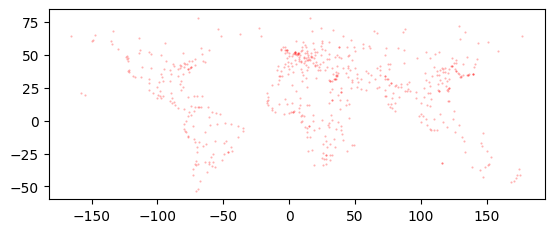

In [298]:
#plotting cities
cities.plot(marker='.',
            color='red',
            markersize=1,
            alpha=0.3)

<Axes: >

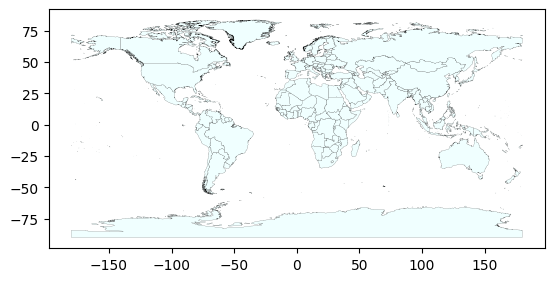

In [299]:
#plotting countries
countries.plot(facecolor="azure",#color of polygon fill
               edgecolor='black', #color of lines
               linewidth=0.1) #thickness of lines

<Axes: >

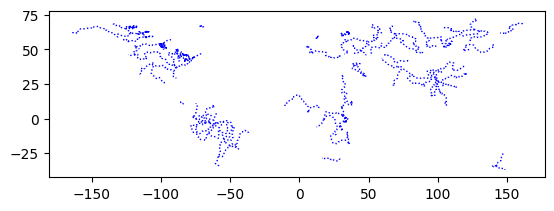

In [300]:
#plotting hydro
hydro.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted')

<Axes: >

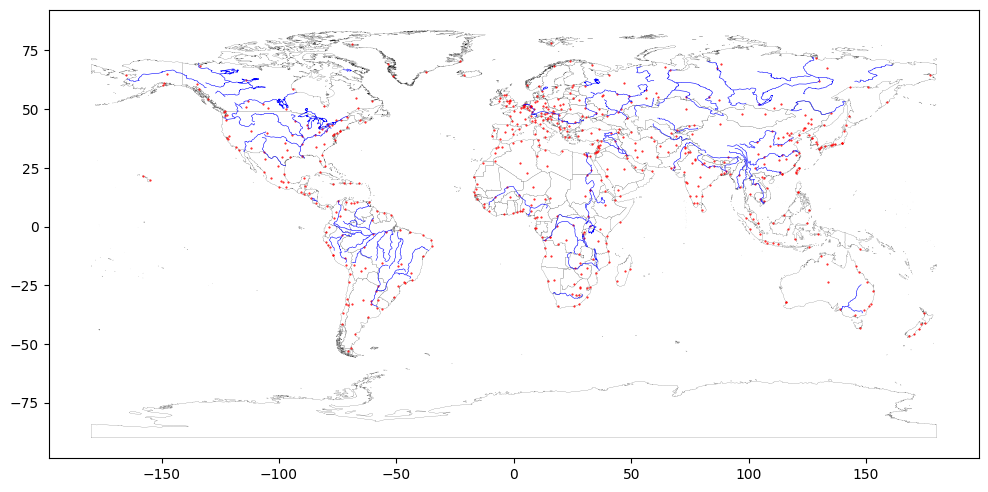

In [301]:
#countries will be the base
base = countries.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))
#hydro and cities will be layers
hydro.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# on top of countries
cities.plot(marker='.', color='red', markersize=1,alpha=1,
            ax=base) # on top of countries

In [302]:
#lets make each gpkg files
countries.to_file("countries.gpkg", driver="GPKG")
cities.to_file("cities.gpkg", driver="GPKG")
hydro.to_file("hydro.gpkg", driver="GPKG")

# **Geomerging**

In [303]:
#we add data from a previous repo
fragilityCia_url="https://github.com/CienciaDeDatosEspacial/merging/raw/main/FragilityCia_isos.csv"
fragilityCia=pd.read_csv(fragilityCia_url)
#lets check some rows
fragilityCia.head()

,Officialstatename,InternetccTLD,iso2,iso3,Country,fragility_date,fragility,co2,co2_date,region,ForestRev_gdp,ForestRev_date
0,The Islamic Republic of Afghanistan,.af,AF,AFG,AFGHANISTAN,2019,105.0,7893000.0,2019,SOUTH ASIA,0.20,2018
1,The Republic of Albania,.al,AL,ALB,ALBANIA,2019,58.9,3794000.0,2019,EUROPE,0.18,2018
2,The People's Democratic Republic of Algeria,.dz,DZ,DZA,ALGERIA,2019,75.4,151633000.0,2019,AFRICA,0.10,2018
3,The Republic of Angola,.ao,AO,AGO,ANGOLA,2019,87.8,19362000.0,2019,AFRICA,0.36,2018
4,Antigua and Barbuda,.ag,AG,ATG,ANTIGUA AND BARBUDA,2019,54.4,729000.0,2019,CENTRAL AMERICA AND THE CARIBBEAN,0.00,2018


In [304]:
# Uppercase to the column 'Country'
countries['COUNTRY']=countries.COUNTRY.str.upper()

In [305]:
#we check we have same countries names in Fragility
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
#we check we have same countries names in countries map
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

In [306]:
#as we can see in fragility
onlyFragilList=list(onlyFragilCia)
OnlyFragildf=pd.DataFrame(onlyFragilList, columns=['Country'])
print(OnlyFragildf)

                                              Country
0                    BOLIVIA (PLURINATIONAL STATE OF)
1                          IRAN (ISLAMIC REPUBLIC OF)
2                                       CÔTE D'IVOIRE
3                                         TIMOR-LESTE
4                                               SAMOA
5                                       BAHAMAS (THE)
6                           MOLDOVA (THE REPUBLIC OF)
7              CONGO (THE DEMOCRATIC REPUBLIC OF THE)
8                                         SUDAN (THE)
9                                   PHILIPPINES (THE)
10                                  NETHERLANDS (THE)
11                                  BRUNEI DARUSSALAM
12                     CENTRAL AFRICAN REPUBLIC (THE)
13                   MICRONESIA (FEDERATED STATES OF)
14                         UNITED ARAB EMIRATES (THE)
15                           RUSSIAN FEDERATION (THE)
16                                           ESWATINI
17  UNITED KINGDOM OF GREAT 

In [307]:
#as we can see in maps
onlyMap=list(onlyMap)
OnlyMapdf=pd.DataFrame(onlyMap, columns=['Country'])
print(OnlyMapdf)

                            Country
0        WALLIS AND FUTUNA (FRANCE)
1                    GIBRALTAR (UK)
2                              IRAN
3                         VENEZUELA
4                             TONGA
..                              ...
107                   ANGUILLA (UK)
108             MIDWAY ISLANDS (US)
109  ST. VINCENT AND THE GRENADINES
110                         VANUATU
111                      EAST TIMOR

[112 rows x 1 columns]


# **Fuzzy Merging**

In [308]:
#installing the fuzz lib
!pip install thefuzz
from thefuzz import process

In [309]:
#we create a tuple
#first component is 'country' from OnlyFragilCia
#second component is the best match for that 'country' name found in onlyMap
#we extractOne looping through each country in the onlyFragilCia list
#also sorted() onlyFragilCia list alphabetically before looping
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CABO VERDE', ('CAPE VERDE', 80)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO (THE)', ('CONGO', 90)),
 ('CZECHIA', ('CZECH REPUBLIC', 75)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('ESWATINI', ('MARTINIQUE (FRANCE)', 60)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('IRAN (ISLAMIC REPUBLIC OF)', ('IRAN', 90)),
 ('KOREA (THE REPUBLIC OF)',
  ('SOUTH GEORGIA AND THE SOUTH SANDWICH IS (UK)', 86)),
 ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", ('CZECH REPUBLIC', 86)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NIGER

In [310]:
# we create a dict of changes for the subsetting %similarity 90 or higher
sub1={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)
 if process.extractOne(country,onlyMap)[1]>=90}
sub1
#countries we wanna replace

{'BAHAMAS (THE)': 'BAHAMAS',
 'BOLIVIA (PLURINATIONAL STATE OF)': 'BOLIVIA',
 'BRUNEI DARUSSALAM': 'BRUNEI',
 'CENTRAL AFRICAN REPUBLIC (THE)': 'CENTRAL AFRICAN REPUBLIC',
 'COMOROS (THE)': 'COMOROS',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'CONGO (THE)': 'CONGO',
 'DOMINICAN REPUBLIC (THE)': 'DOMINICAN REPUBLIC',
 'GAMBIA (THE)': 'GAMBIA',
 'IRAN (ISLAMIC REPUBLIC OF)': 'IRAN',
 'MICRONESIA (FEDERATED STATES OF)': 'FEDERATED STATES OF MICRONESIA',
 'MOLDOVA (THE REPUBLIC OF)': 'MOLDOVA',
 'NETHERLANDS (THE)': 'NETHERLANDS',
 'NIGER (THE)': 'NIGER',
 'NORTH MACEDONIA': 'MACEDONIA',
 'PHILIPPINES (THE)': 'PHILIPPINES',
 'RUSSIAN FEDERATION (THE)': 'RUSSIA',
 'SAMOA': 'WESTERN SAMOA',
 'SUDAN (THE)': 'SUDAN',
 'TANZANIA, THE UNITED REPUBLIC OF': 'TANZANIA',
 'UNITED ARAB EMIRATES (THE)': 'UNITED ARAB EMIRATES',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)': 'UNITED KINGDOM',
 'UNITED STATES OF AMERICA (THE)': 'UNITED STATES',
 'VIET

In [311]:
#we commit last sub
fragilityCia.replace(to_replace={'Country':sub1},inplace=True)
# lets check matches w %similarity below 90
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('CABO VERDE', ('CAPE VERDE', 80)),
 ('CZECHIA', ('CZECH REPUBLIC', 75)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('ESWATINI', ('MARTINIQUE (FRANCE)', 60)),
 ('KOREA (THE REPUBLIC OF)',
  ('SOUTH GEORGIA AND THE SOUTH SANDWICH IS (UK)', 86)),
 ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", ('CZECH REPUBLIC', 86)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [312]:
# we create a dict of changes for the subsetting %similarity lower than 90
sub2={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)}
sub2
#countries we wanna replace

{'CABO VERDE': 'CAPE VERDE',
 'CZECHIA': 'CZECH REPUBLIC',
 "CÔTE D'IVOIRE": 'IVORY COAST',
 'ESWATINI': 'MARTINIQUE (FRANCE)',
 'KOREA (THE REPUBLIC OF)': 'SOUTH GEORGIA AND THE SOUTH SANDWICH IS (UK)',
 "LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)": 'CZECH REPUBLIC',
 'TIMOR-LESTE': 'EAST TIMOR'}

In [313]:
# we commit last sub
fragilityCia.replace(to_replace={'Country':sub2},inplace=True)

In [314]:
#lets merge maps and fragility
MapAndFragility=countries.merge(fragilityCia,left_on='COUNTRY', right_on='Country')
#we drop 'Country' in maps since its not needed
MapAndFragility.drop(columns=['Country'],inplace=True)
# we check df type
MapAndFragility.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   COUNTRY            171 non-null    object  
 1   geometry           171 non-null    geometry
 2   Officialstatename  171 non-null    object  
 3   InternetccTLD      171 non-null    object  
 4   iso2               170 non-null    object  
 5   iso3               171 non-null    object  
 6   fragility_date     171 non-null    int64   
 7   fragility          171 non-null    float64 
 8   co2                171 non-null    float64 
 9   co2_date           171 non-null    int64   
 10  region             171 non-null    object  
 11  ForestRev_gdp      171 non-null    float64 
 12  ForestRev_date     171 non-null    int64   
dtypes: float64(3), geometry(1), int64(3), object(6)
memory usage: 17.5+ KB


In [315]:
#we check df
MapAndFragility

,COUNTRY,geometry,Officialstatename,InternetccTLD,iso2,iso3,fragility_date,fragility,co2,co2_date,region,ForestRev_gdp,ForestRev_date
0,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",Antigua and Barbuda,.ag,AG,ATG,2019,54.4,729000.0,2019,CENTRAL AMERICA AND THE CARIBBEAN,0.00,2018
1,AFGHANISTAN,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",The Islamic Republic of Afghanistan,.af,AF,AFG,2019,105.0,7893000.0,2019,SOUTH ASIA,0.20,2018
2,ALGERIA,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236...",The People's Democratic Republic of Algeria,.dz,DZ,DZA,2019,75.4,151633000.0,2019,AFRICA,0.10,2018
3,AZERBAIJAN,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...",The Republic of Azerbaijan,.az,AZ,AZE,2019,73.2,35389000.0,2019,MIDDLE EAST,0.02,2018
4,ALBANIA,"POLYGON ((20.79192 40.43154, 20.78722 40.39472...",The Republic of Albania,.al,AL,ALB,2019,58.9,3794000.0,2019,EUROPE,0.18,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,ZAMBIA,"POLYGON ((30.21302 -14.98172, 30.21917 -15.096...",The Republic of Zambia,.zm,ZM,ZMB,2019,85.7,6798000.0,2019,AFRICA,4.45,2018
167,ZIMBABWE,"POLYGON ((32.48888 -21.34445, 32.46541 -21.325...",The Republic of Zimbabwe,.zw,ZW,ZWE,2019,99.5,7902000.0,2019,AFRICA,1.61,2018
168,SOUTH SUDAN,"POLYGON ((34.21807 9.96458, 34.20722 9.90500, ...",The Republic of South Sudan,.ss,SS,SSD,2019,112.2,1778000.0,2019,AFRICA,2.65,2015
169,INDONESIA,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832...",The Republic of Indonesia,.id,ID,IDN,2019,70.4,563543000.0,2019,EAST AND SOUTHEAST ASIA,0.39,2018


# **Transformation of data values**

In [316]:
#these are variables we wanna reshape
DataNames=['fragility', 'co2','ForestRev_gdp']

In [317]:
#reshaping MapAndFragility
pd.melt(MapAndFragility[DataNames])

,variable,value
0,fragility,54.40
1,fragility,105.00
2,fragility,75.40
3,fragility,73.20
4,fragility,58.90
...,...,...
508,ForestRev_gdp,4.45
509,ForestRev_gdp,1.61
510,ForestRev_gdp,2.65
511,ForestRev_gdp,0.39


In [318]:
#importing useful libs
import seaborn as sns
import matplotlib.pyplot as plt

In [319]:
#installing machine learning libs
!pip install -U scikit-learn

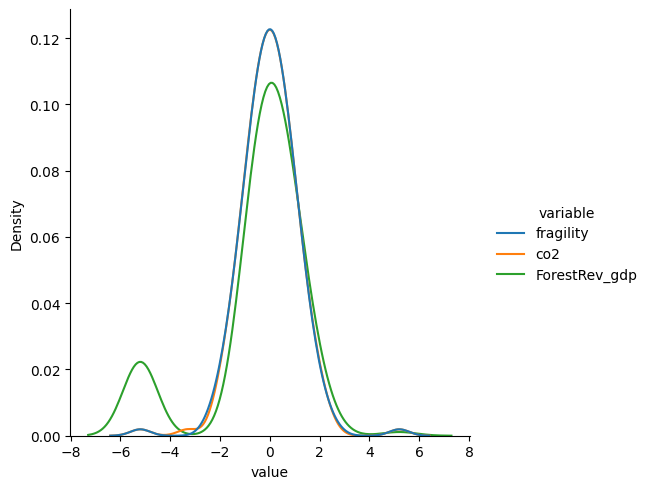

In [320]:
#we use quantile-transformer since we want to transform data to normal distribution
#first we need to import the class from the module
from sklearn.preprocessing import QuantileTransformer
#we split the data in 99 quantiles
#set the random seed at 0
#following a normal distribution
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal')
#transforming the data according to the scaler to QtScaled_data
QtScaled_data = scaler.fit_transform(MapAndFragility[DataNames])
#then we create a df with the QtScaled_data and the columns Data Names
#we reshape this df with melt
#finally we plot with variable in x-axis
#we color based on hue='variable': 'fragility', 'co2','ForestRev_gdp'
sns.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [321]:
#we add a nuew column with the quantile transformed values
MapAndFragility['fragility_Qt']=QtScaled_data[:,0]

# **Discretizing**

In [322]:
#installing more libs ill never understand
! pip install numba mapclassify numpy

In [323]:
#also importing
import mapclassify
import numpy as np

In [324]:
#we set a random seed
np.random.seed(12345)
# first we try with 5 intervals in our varible column
K=5
theVar=MapAndFragility.fragility_Qt

#we try multiple clasification schemes
#EqualInterval: same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
#Std.Mean: same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
#Quantiles: interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)
#MaximumBraks: based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
#HeadTailBraks: based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar)
#FisheJenks: based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
#JenksCaspall: based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
#MaxP: based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

In [325]:
#making a tuple of the schemes
class5 = ei5,msd,q5,mb5,ht,fj5,jc5,mp5
#we need the Absolute Deviation Around the Median for each classifier
#lets get the value iterating .adcm for each class5 classifier
fits = np.array([ c.adcm for c in class5])
#lets turn into a df
adcms = pd.DataFrame(fits)
#Adding classifier names
adcms['classifier'] = [c.name for c in class5]
#Adding column names to adcms df
adcms.columns = ['ADCM', 'Classifier']

In [326]:
adcms

,ADCM,Classifier
0,72.179821,EqualInterval
1,79.089109,StdMean
2,44.219209,Quantiles
3,127.345853,MaximumBreaks
4,59.543345,HeadTailBreaks
5,56.247498,FisherJenks
6,42.878963,JenksCaspall
7,51.880123,MaxP


<Axes: ylabel='Classifier'>

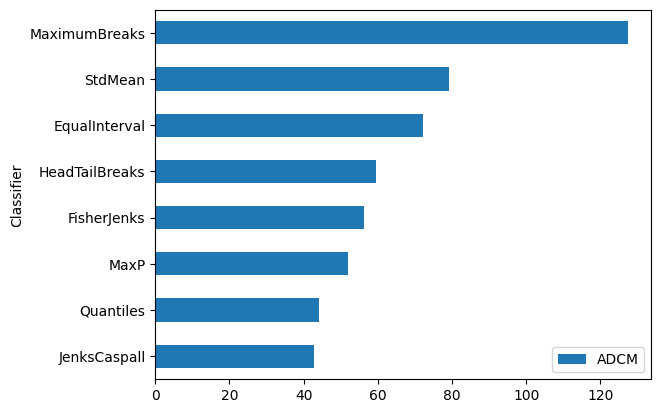

In [327]:
#lets plot for a quick comparison to decide which one performs better in terms of ADCM
adcms.sort_values('ADCM').plot.barh(x='Classifier')
#as we can see JenksCaspall(jc5) minimize the absolute deviation of data around its median value

# **Making a new variable**

In [328]:
#adding the new clasification scheme as a column
MapAndFragility['fragility_Qt_jc5'] = jc5.yb

In [329]:
#showing values of the specified columns
MapAndFragility[['fragility_Qt','fragility_Qt_jc5']]

,fragility_Qt,fragility_Qt_jc5
0,-5.301130e-01,1
1,1.827146e+00,4
2,3.045198e-01,3
3,2.336949e-01,2
4,-4.244473e-01,1
...,...,...
166,8.593575e-01,3
167,1.668252e+00,4
168,2.590633e+00,4
169,-1.391458e-16,2


In [330]:
#we make an index list with the fragility_Qt_jc5 since we want to categorize by this var
indexList=['fragility_Qt_jc5']
#we add a new mean column that will help us to get the mean of each category
aggregator={'fragility_Qt': ['mean']}
#we concatenate by .gruoupby
pd.concat([MapAndFragility[['fragility_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)
#as we can see these are the mean values for each category in fragility_Qt_jc5

,fragility_Qt_jc5,fragility_Qt
,,mean
0,0,-1.685317
1,1,-0.652170
2,2,-0.006005
3,3,0.614405
4,4,1.618874


In [331]:
#lets name these categories by level names
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}
#we drop fragility_Qt_jc5 and replace it with newLabelsForLevels
MapAndFragility['fragility_Qt_jc5_cat']=MapAndFragility.loc[:,'fragility_Qt_jc5'].replace(newLabelsForLevels)
#we have
MapAndFragility[['fragility_Qt','fragility_Qt_jc5','fragility_Qt_jc5_cat']]

,fragility_Qt,fragility_Qt_jc5,fragility_Qt_jc5_cat
0,-5.301130e-01,1,1_Good
1,1.827146e+00,4,4_Poor
2,3.045198e-01,3,3_Bad
3,2.336949e-01,2,2_Middle
4,-4.244473e-01,1,1_Good
...,...,...,...
166,8.593575e-01,3,3_Bad
167,1.668252e+00,4,4_Poor
168,2.590633e+00,4,4_Poor
169,-1.391458e-16,2,2_Middle


# **Choropleth**

In [332]:
import matplotlib.pyplot as plt

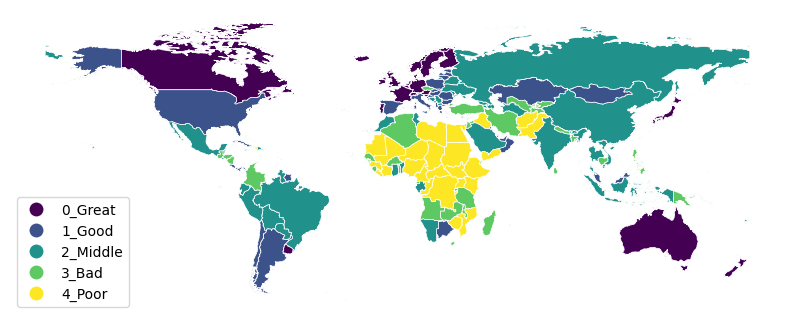

In [333]:
#cloroplething according to fragility_Qt_jc5_cat
f, ax = plt.subplots(1, figsize=(10, 10))
#setting for the map
MapAndFragility.plot(column='fragility_Qt_jc5_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0.5, # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # legend
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

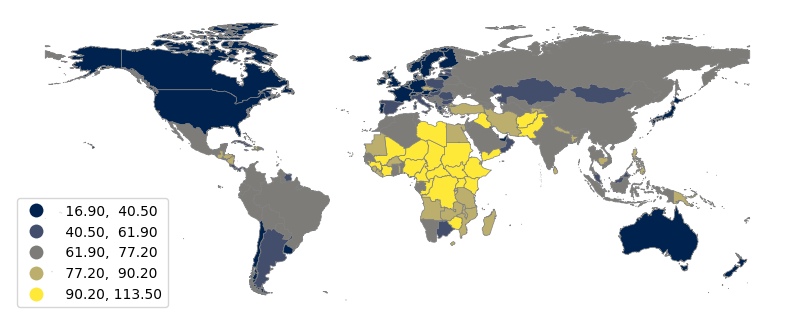

In [334]:
#cloroplething without using a new variable
f, ax = plt.subplots(1, figsize=(10, 10))
MapAndFragility.plot(column='fragility', #base variable to plot
                   cmap='cividis', #coloring options
                   scheme="jenkscaspall",k=5, #clasification shceme chosen #number of intervas
        edgecolor='grey',#border color
        linewidth=0.5, #width of border
        alpha=1,# level of transparency (0 is invisible)
        legend=True,#legend
        # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

In [335]:
# finally we save gpkg file
MapAndFragility.to_file("MapAndFragilty.gpkg", driver="GPKG")

# **Tarea Calificada 4**

# 1.Transform the co2 and forest variables

In [336]:
#these are variables we wanna reshape
DataNames=['fragility', 'co2','ForestRev_gdp']

In [337]:
#reshaping MapAndFragility
pd.melt(MapAndFragility[DataNames])

,variable,value
0,fragility,54.40
1,fragility,105.00
2,fragility,75.40
3,fragility,73.20
4,fragility,58.90
...,...,...
508,ForestRev_gdp,4.45
509,ForestRev_gdp,1.61
510,ForestRev_gdp,2.65
511,ForestRev_gdp,0.39


In [338]:
#importing useful libs
import seaborn as sns
import matplotlib.pyplot as plt

In [339]:
#installing machine learning libs
!pip install -U scikit-learn

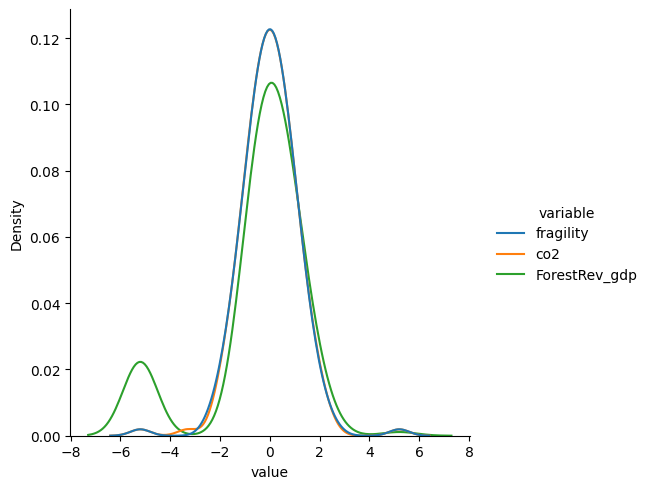

In [340]:
#we use quantile-transformer since we want to transform data to normal distribution
#first we need to import the class from the module
from sklearn.preprocessing import QuantileTransformer
#we split the data in 99 quantiles
#set the random seed at 0
#following a normal distribution
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal')
#transforming the data according to the scaler to QtScaled_data
QtScaled_data = scaler.fit_transform(MapAndFragility[DataNames])
#then we create a df with the QtScaled_data and the columns Data Names
#we reshape this df with melt
#finally we plot with variable in x-axis
#we color based on hue='variable': 'fragility', 'co2','ForestRev_gdp'
sns.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [341]:
#we add a new columns with the quantile transformed values
MapAndFragility['co2_Qt']=QtScaled_data[:,0]
MapAndFragility['ForestRev_gdp_Qt']=QtScaled_data[:,0]

In [342]:
#as we can see
MapAndFragility[['co2_Qt','ForestRev_gdp_Qt']]

,co2_Qt,ForestRev_gdp_Qt
0,-5.301130e-01,-5.301130e-01
1,1.827146e+00,1.827146e+00
2,3.045198e-01,3.045198e-01
3,2.336949e-01,2.336949e-01
4,-4.244473e-01,-4.244473e-01
...,...,...
166,8.593575e-01,8.593575e-01
167,1.668252e+00,1.668252e+00
168,2.590633e+00,2.590633e+00
169,-1.391458e-16,-1.391458e-16


# 2. Discretize the result chosen

In [343]:
#installing more libs ill never understand
! pip install numba mapclassify numpy

In [344]:
#also importing
import mapclassify
import numpy as np

In [345]:
#we set the same random seed
np.random.seed(12345)
# lets try with 10 intervals
K=10
theVar=MapAndFragility.fragility_Qt

#we try multiple clasification schemes
#EqualInterval: same interval width, easy interpretation
ei10 = mapclassify.EqualInterval(theVar, k=K)
#Std.Mean: same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
#Quantiles: interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q10=mapclassify.Quantiles(theVar,k=K)
#MaximumBraks: based on similarity, good for multimodal data
mb10 = mapclassify.MaximumBreaks(theVar, k=K)
#HeadTailBraks: based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar)
#FisheJenks: based on similarity, optimizer
fj10 = mapclassify.FisherJenks(theVar, k=K)
#JenksCaspall: based on similarity, optimizer
jc10 = mapclassify.JenksCaspall(theVar, k=K)
#MaxP: based on similarity, optimizer
mp10 = mapclassify.MaxP(theVar, k=K)

In [346]:
#making a tuple of the schemes
class10 = ei10,msd,q10,mb10,ht,fj10,jc10,mp10
#we need the Absolute Deviation Around the Median for each classifier
#lets get the value iterating .adcm for each class5 classifier
fits = np.array([ c.adcm for c in class10])
#lets turn into a df
adcms = pd.DataFrame(fits)
#Adding classifier names
adcms['classifier'] = [c.name for c in class10]
#Adding column names to adcms df
adcms.columns = ['ADCM', 'Classifier']

In [347]:
adcms

,ADCM,Classifier
0,41.961215,EqualInterval
1,79.089109,StdMean
2,26.690197,Quantiles
3,101.766879,MaximumBreaks
4,59.543345,HeadTailBreaks
5,23.371072,FisherJenks
6,25.064121,JenksCaspall
7,37.234888,MaxP


<Axes: ylabel='Classifier'>

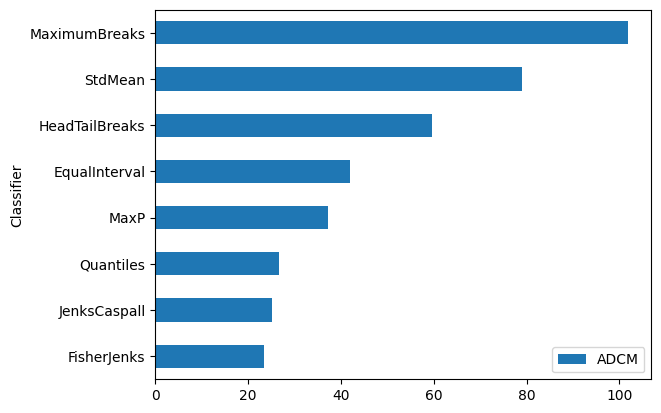

In [348]:
#lets plot for a quick comparison to decide which one performs better in terms of ADCM
adcms.sort_values('ADCM').plot.barh(x='Classifier')
#this time Fisher Jenks (fj10) minimize the absolute deviation of data around its median value

# 3. Make the maps for the co2 and forest variables.

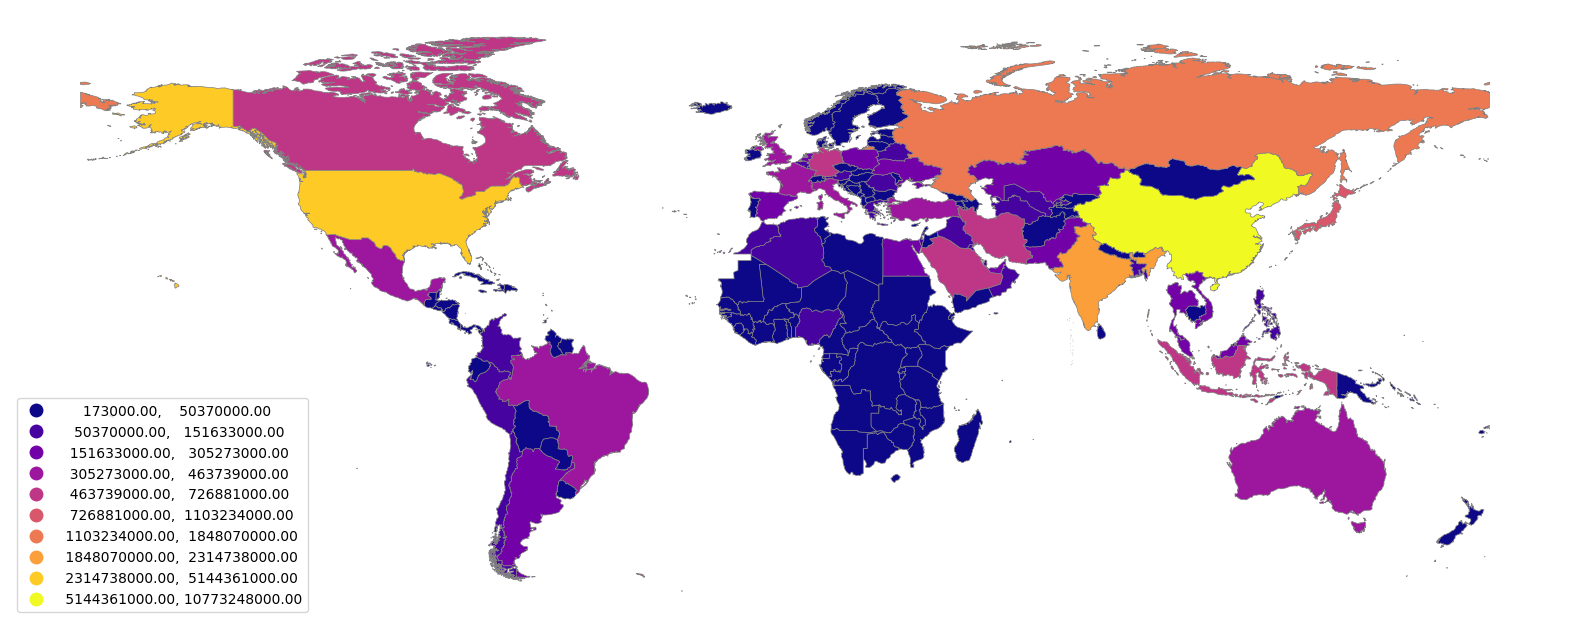

In [349]:
#cloroplething co2
f, ax = plt.subplots(1, figsize=(20, 20))
MapAndFragility.plot(column='co2', #base variable to plot
                   cmap='plasma', #coloring options
                   scheme="fisherjenks",k=10, #clasification shceme chosen #number of intervas
        edgecolor='grey',#border color
        linewidth=0.5, #width of border
        alpha=1,# level of transparency (0 is invisible)
        legend=True,#legend
        # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

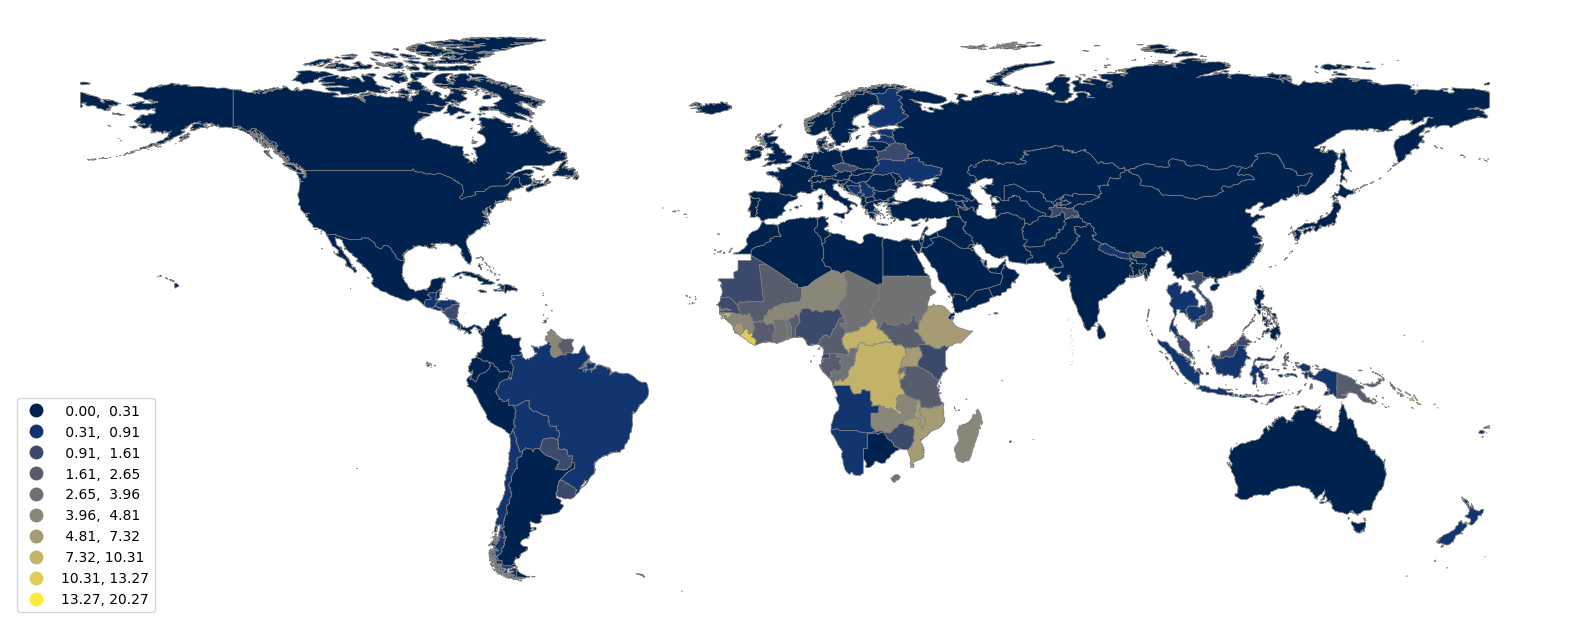

In [350]:
#cloroplething ForestRev_gdp
f, ax = plt.subplots(1, figsize=(20, 20))
MapAndFragility.plot(column='ForestRev_gdp', #base variable to plot
                   cmap='cividis', #coloring options
                   scheme="fisherjenks",k=10, #clasification shceme chosen #number of intervas
        edgecolor='grey',#border color
        linewidth=0.5, #width of border
        alpha=1,# level of transparency (0 is invisible)
        legend=True,#legend
        # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

# 4. Add another variable (merge) from the web (or any other source). Transform it , discretize it, and map it.

# **Geomerging**

In [371]:
#usaremos la data trabajada en la tarea calificada 2 (pero previamente limpiada)
LifeExpec_url = "https://raw.githubusercontent.com/rubbims/introgeodf/main/HDR21-22.csv"
LifeExpec = pd.read_csv(LifeExpec_url)
LifeExpec.head()

,HDI rank,Country,Life expectancy at birth(years),Expected years of schooling(years),Gross national income (GNI) per capita
0,1,Switzerland,84.0,16.5,66933
1,2,Norway,83.2,18.2,64660
2,3,Iceland,82.7,19.2,55782
3,4,"Hong Kong, China (SAR)",85.5,17.3,62607
4,5,Australia,84.5,21.1,49238


In [372]:
# Uppercase to the column 'Country'
LifeExpec['COUNTRY']=LifeExpec.Country.str.upper()

In [373]:
#we check we have same countries names in LifeExpec
onlyLifeExpec=set(LifeExpec.Country)- set(countries.COUNTRY)
#we check we have same countries names in countries map
onlyMaps=set(countries.COUNTRY)- set(LifeExpec.Country)

In [374]:
#as we can see in LifeExpec
OnlyLifeList=list(onlyLifeExpec)
OnlyLifedf=pd.DataFrame(OnlyLifeList, columns=['Country'])
print(OnlyLifedf)

          Country
0         Belgium
1           Ghana
2           Samoa
3     Saint Lucia
4        Mongolia
..            ...
186    Luxembourg
187  Turkmenistan
188      Pakistan
189    Kyrgyzstan
190    Tajikistan

[191 rows x 1 columns]


In [375]:
#as we can see in maps
onlyMaps=list(onlyMaps)
OnlyMapsdf=pd.DataFrame(onlyMaps, columns=['Country'])
print(OnlyMapsdf)

                            Country
0                           NIGERIA
1                            ZAMBIA
2                            NORWAY
3                         ARGENTINA
4                          BULGARIA
..                              ...
247  ST. VINCENT AND THE GRENADINES
248                         VANUATU
249                      EAST TIMOR
250                          GUYANA
251                    SAUDI ARABIA

[252 rows x 1 columns]


# **Fuzzy Merging**

In [376]:
#installing the fuzz libs
!pip install thefuzz
from thefuzz import process

In [377]:
#we create a tuple
#first component is 'country' from onlyLifeExpec
#second component is the best match for that 'country' name found in onlyMaps
#we extractOne looping through each country in the onlyLifeExpec list
#also sorted() onlyLifeExpec list alphabetically before looping
[(country, process.extractOne(country,onlyMaps)) for country in sorted(onlyLifeExpec)]

[('Afghanistan', ('AFGHANISTAN', 100)),
 ('Albania', ('ALBANIA', 100)),
 ('Algeria', ('ALGERIA', 100)),
 ('Andorra', ('ANDORRA', 100)),
 ('Angola', ('ANGOLA', 100)),
 ('Antigua and Barbuda', ('ANTIGUA AND BARBUDA', 100)),
 ('Argentina', ('ARGENTINA', 100)),
 ('Armenia', ('ARMENIA', 100)),
 ('Australia', ('AUSTRALIA', 100)),
 ('Austria', ('AUSTRIA', 100)),
 ('Azerbaijan', ('AZERBAIJAN', 100)),
 ('Bahamas', ('BAHAMAS', 100)),
 ('Bahrain', ('BAHRAIN', 100)),
 ('Bangladesh', ('BANGLADESH', 100)),
 ('Barbados', ('BARBADOS', 100)),
 ('Belarus', ('BELARUS', 100)),
 ('Belgium', ('BELGIUM', 100)),
 ('Belize', ('BELIZE', 100)),
 ('Benin', ('BENIN', 100)),
 ('Bhutan', ('BHUTAN', 100)),
 ('Bolivia (Plurinational State of)', ('BOLIVIA', 90)),
 ('Bosnia and Herzegovina', ('BOSNIA AND HERZEGOVINA', 100)),
 ('Botswana', ('BOTSWANA', 100)),
 ('Brazil', ('BRAZIL', 100)),
 ('Brunei Darussalam', ('BRUNEI', 90)),
 ('Bulgaria', ('BULGARIA', 100)),
 ('Burkina Faso', ('BURKINA FASO', 100)),
 ('Burundi', ('BUR

In [378]:
# we create a dict of changes for the subsetting %similarity 90 or higher
subset1={country: process.extractOne(country,onlyMaps)[0] for country in sorted(onlyLifeExpec)
 if process.extractOne(country,onlyMaps)[1]>=90}
subset1
#countries we wanna replace

{'Afghanistan': 'AFGHANISTAN',
 'Albania': 'ALBANIA',
 'Algeria': 'ALGERIA',
 'Andorra': 'ANDORRA',
 'Angola': 'ANGOLA',
 'Antigua and Barbuda': 'ANTIGUA AND BARBUDA',
 'Argentina': 'ARGENTINA',
 'Armenia': 'ARMENIA',
 'Australia': 'AUSTRALIA',
 'Austria': 'AUSTRIA',
 'Azerbaijan': 'AZERBAIJAN',
 'Bahamas': 'BAHAMAS',
 'Bahrain': 'BAHRAIN',
 'Bangladesh': 'BANGLADESH',
 'Barbados': 'BARBADOS',
 'Belarus': 'BELARUS',
 'Belgium': 'BELGIUM',
 'Belize': 'BELIZE',
 'Benin': 'BENIN',
 'Bhutan': 'BHUTAN',
 'Bolivia (Plurinational State of)': 'BOLIVIA',
 'Bosnia and Herzegovina': 'BOSNIA AND HERZEGOVINA',
 'Botswana': 'BOTSWANA',
 'Brazil': 'BRAZIL',
 'Brunei Darussalam': 'BRUNEI',
 'Bulgaria': 'BULGARIA',
 'Burkina Faso': 'BURKINA FASO',
 'Burundi': 'BURUNDI',
 'Cambodia': 'CAMBODIA',
 'Cameroon': 'CAMEROON',
 'Canada': 'CANADA',
 'Central African Republic': 'CENTRAL AFRICAN REPUBLIC',
 'Chad': 'CHAD',
 'Chile': 'CHILE',
 'China': 'CHINA',
 'Colombia': 'COLOMBIA',
 'Comoros': 'COMOROS',
 'Con

In [379]:
#we commit last sub
LifeExpec.replace(to_replace={'Country':subset1},inplace=True)
# lets check matches w %similarity below 90
onlyLifeExpec=set(LifeExpec.Country)- set(countries.COUNTRY)
onlyMaps=set(countries.COUNTRY)- set(LifeExpec.Country)
[(country, process.extractOne(country,onlyMaps)) for country in sorted(onlyLifeExpec)]

[('Cabo Verde', ('CAPE VERDE', 80)),
 ('Czechia', ('CZECH REPUBLIC', 75)),
 ("CÃ´te d'Ivoire", ('CAPE VERDE', 52)),
 ('Eswatini (Kingdom of)', ('SWAZILAND', 56)),
 ('Korea (Republic of)', ('NORTH KOREA', 86)),
 ("Lao People's Democratic Republic", ('CZECH REPUBLIC', 86)),
 ('Saint Lucia', ('ST. LUCIA', 80)),
 ('Timor-Leste', ('EAST TIMOR', 81)),
 ('TÃ¼rkiye', ('TURKEY', 67))]

In [380]:
# we create a dict of changes for the subsetting %similarity lower than 90
subset2={country: process.extractOne(country,onlyMaps)[0] for country in sorted(onlyLifeExpec)}
subset2
#countries we wanna replace

{'Cabo Verde': 'CAPE VERDE',
 'Czechia': 'CZECH REPUBLIC',
 "CÃ´te d'Ivoire": 'CAPE VERDE',
 'Eswatini (Kingdom of)': 'SWAZILAND',
 'Korea (Republic of)': 'NORTH KOREA',
 "Lao People's Democratic Republic": 'CZECH REPUBLIC',
 'Saint Lucia': 'ST. LUCIA',
 'Timor-Leste': 'EAST TIMOR',
 'TÃ¼rkiye': 'TURKEY'}

In [381]:
# we commit last sub
LifeExpec.replace(to_replace={'Country':subset2},inplace=True)

In [382]:
#lets merge maps and lifeExpec
MapAndLife=countries.merge(LifeExpec,left_on='COUNTRY', right_on='Country')
#we drop 'Country' in maps since its not needed
MapAndLife.drop(columns=['Country'],inplace=True)
# we check df type
MapAndLife.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   COUNTRY_x                               191 non-null    object  
 1   geometry                                191 non-null    geometry
 2   HDI rank                                191 non-null    int64   
 3   Life expectancy at birth(years)         191 non-null    float64 
 4   Expected years of schooling(years)      191 non-null    float64 
 5   Gross national income (GNI) per capita  191 non-null    int64   
 6   COUNTRY_y                               191 non-null    object  
dtypes: float64(2), geometry(1), int64(2), object(2)
memory usage: 10.6+ KB


In [385]:
#giving format
MapAndLife=MapAndLife.drop(columns=['COUNTRY_y'])
MapAndLife = MapAndLife.rename(columns={'COUNTRY_x': 'COUNTRY'})
MapAndLife

,COUNTRY,geometry,HDI rank,Life expectancy at birth(years),Expected years of schooling(years),Gross national income (GNI) per capita
0,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",71,78.5,14.2,16792
1,AFGHANISTAN,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",180,62.0,10.3,1824
2,ALGERIA,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236...",91,76.4,14.6,10800
3,AZERBAIJAN,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...",91,69.4,13.5,14257
4,ALBANIA,"POLYGON ((20.79192 40.43154, 20.78722 40.39472...",67,76.5,14.4,14131
...,...,...,...,...,...,...
186,ZAMBIA,"POLYGON ((30.21302 -14.98172, 30.21917 -15.096...",154,61.2,10.9,3218
187,ZIMBABWE,"POLYGON ((32.48888 -21.34445, 32.46541 -21.325...",146,59.3,12.1,3810
188,SOUTH SUDAN,"POLYGON ((34.21807 9.96458, 34.20722 9.90500, ...",191,55.0,5.5,768
189,INDONESIA,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832...",114,67.6,13.7,11466


# **Transformation of de data values**

In [386]:
#these are variables we wanna reshape
LifeDataNames=['Life expectancy at birth(years)','Expected years of schooling(years)','Gross national income (GNI) per capita']

In [387]:
#reshaping MapAndLife
pd.melt(MapAndLife[LifeDataNames])

,variable,value
0,Life expectancy at birth(years),78.5
1,Life expectancy at birth(years),62.0
2,Life expectancy at birth(years),76.4
3,Life expectancy at birth(years),69.4
4,Life expectancy at birth(years),76.5
...,...,...
568,Gross national income (GNI) per capita,3218.0
569,Gross national income (GNI) per capita,3810.0
570,Gross national income (GNI) per capita,768.0
571,Gross national income (GNI) per capita,11466.0


In [388]:
#importing useful libs
import seaborn as sns
import matplotlib.pyplot as plt

In [389]:
#installing machine learning libs
!pip install -U scikit-learn

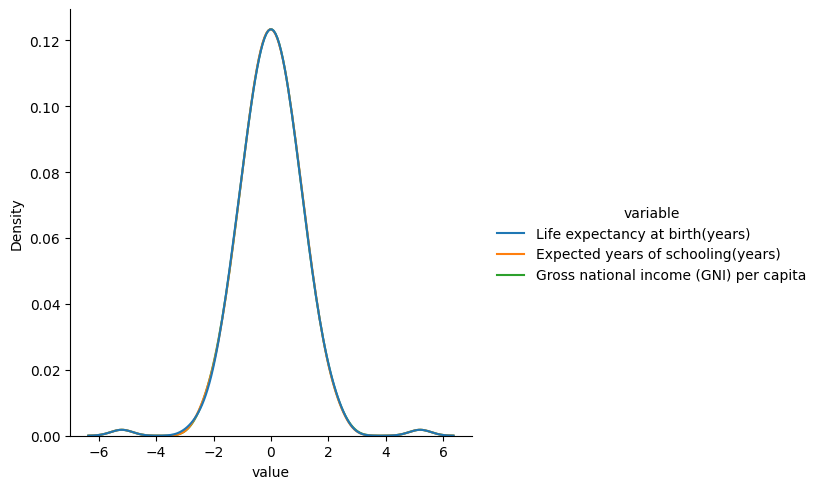

In [391]:
#we use quantile-transformer since we want to transform data to normal distribution
#first we need to import the class from the module
from sklearn.preprocessing import QuantileTransformer
#we split the data in 99 quantiles
#set the random seed at 0
#following a normal distribution
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal')
#transforming the data according to the scaler to QtScaled_data
QtScaled_data = scaler.fit_transform(MapAndLife[LifeDataNames])
#then we create a df with the QtScaled_data and the columns Data Names
#we reshape this df with melt
#finally we plot with variable in x-axis
#we color based on hue='variable': 'fragility', 'co2','ForestRev_gdp'
sns.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=LifeDataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [393]:
#we add a new columns with the quantile transformed values
MapAndLife['Life_expectancy_at_birth(years)_Qt']=QtScaled_data[:,0]
MapAndLife['Expected_years_of_schooling(years)_Qt']=QtScaled_data[:,0]
MapAndLife['Gross_national_income_(GNI)_per_capita']=QtScaled_data[:,0]

In [394]:
#as we can see
MapAndLife[['Life_expectancy_at_birth(years)_Qt','Expected_years_of_schooling(years)_Qt','Gross_national_income_(GNI)_per_capita']]

,Life_expectancy_at_birth(years)_Qt,Expected_years_of_schooling(years)_Qt,Gross_national_income_(GNI)_per_capita
0,0.824829,0.824829,0.824829
1,-1.069212,-1.069212,-1.069212
2,0.627072,0.627072,0.627072
3,-0.366106,-0.366106,-0.366106
4,0.658520,0.658520,0.658520
...,...,...,...
186,-1.223236,-1.223236,-1.223236
187,-1.544575,-1.544575,-1.544575
188,-2.037390,-2.037390,-2.037390
189,-0.506872,-0.506872,-0.506872


# **Discretizing**

In [395]:
#installing more libs ill never understand
! pip install numba mapclassify numpy

In [396]:
#also importing
import mapclassify
import numpy as np

In [397]:
#we set the same random seed
np.random.seed(12345)
# lets try with 25 intervals
K=25
theVar=MapAndFragility.fragility_Qt

#we try multiple clasification schemes
#EqualInterval: same interval width, easy interpretation
ei25 = mapclassify.EqualInterval(theVar, k=K)
#Std.Mean: same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
#Quantiles: interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q25=mapclassify.Quantiles(theVar,k=K)
#MaximumBraks: based on similarity, good for multimodal data
mb25 = mapclassify.MaximumBreaks(theVar, k=K)
#HeadTailBraks: based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar)
#FisheJenks: based on similarity, optimizer
fj25 = mapclassify.FisherJenks(theVar, k=K)
#JenksCaspall: based on similarity, optimizer
jc25 = mapclassify.JenksCaspall(theVar, k=K)
#MaxP: based on similarity, optimizer
mp25 = mapclassify.MaxP(theVar, k=K)

In [398]:
#making a tuple of the schemes
class25 = ei25,msd,q25,mb25,ht,fj25,jc25,mp25
#we need the Absolute Deviation Around the Median for each classifier
#lets get the value iterating .adcm for each class5 classifier
fits = np.array([ c.adcm for c in class25])
#lets turn into a df
adcms = pd.DataFrame(fits)
#Adding classifier names
adcms['classifier'] = [c.name for c in class25]
#Adding column names to adcms df
adcms.columns = ['ADCM', 'Classifier']

In [399]:
adcms

,ADCM,Classifier
0,16.850357,EqualInterval
1,79.089109,StdMean
2,14.388969,Quantiles
3,48.393390,MaximumBreaks
4,59.543345,HeadTailBreaks
5,7.753383,FisherJenks
6,13.708167,JenksCaspall
7,18.181641,MaxP


<Axes: ylabel='Classifier'>

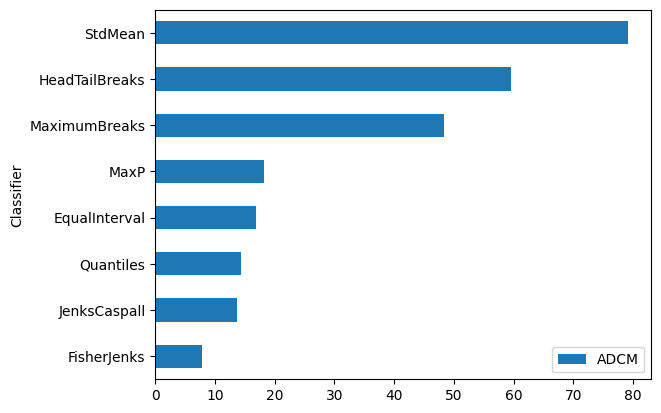

In [400]:
#lets plot for a quick comparison to decide which one performs better in terms of ADCM
adcms.sort_values('ADCM').plot.barh(x='Classifier')
#this time Fisher Jenks (fj10) minimize the absolute deviation of data around its median value

# **Choropleth**

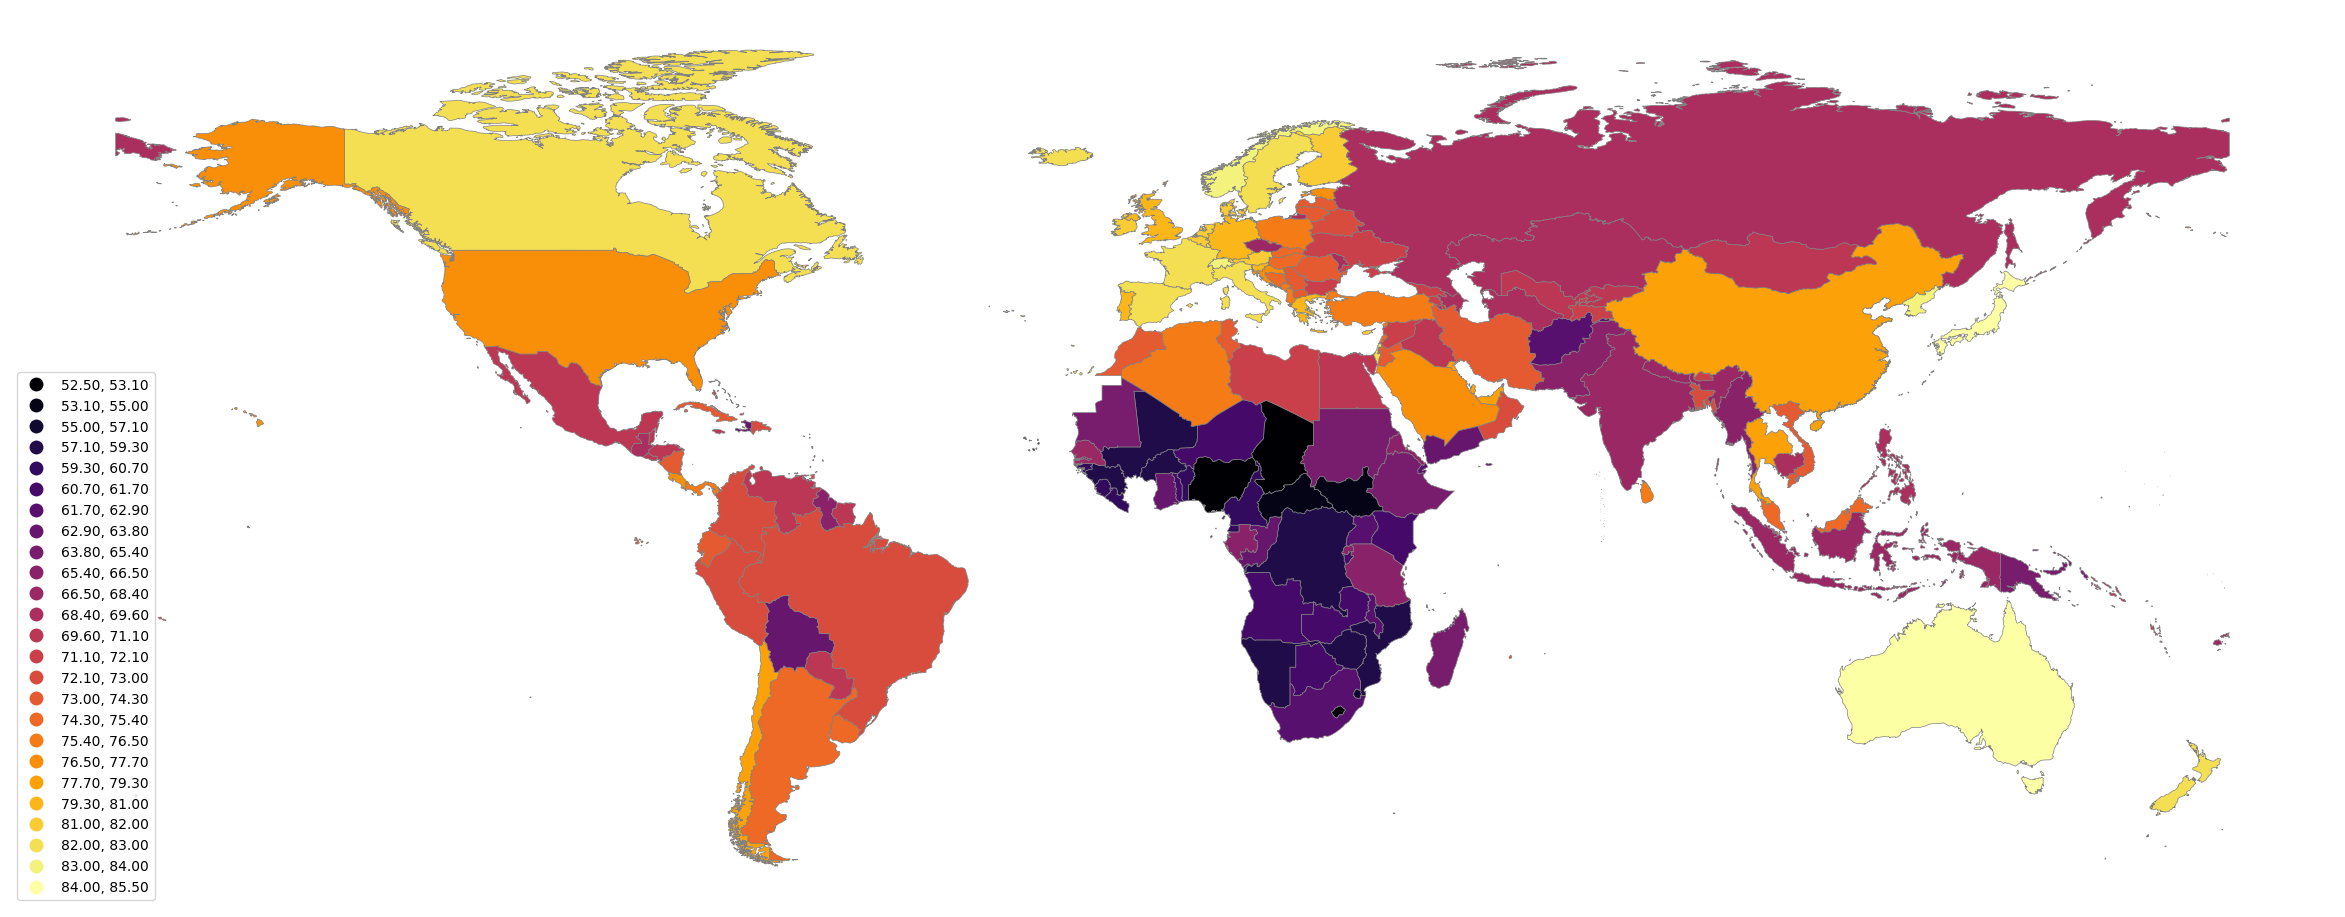

In [407]:
#cloroplething Life expectancy at birth(years)
f, ax = plt.subplots(1, figsize=(30, 30))
MapAndLife.plot(column='Life expectancy at birth(years)', #base variable to plot
                   cmap='inferno', #coloring options
                   scheme="fisherjenks",k=25, #clasification shceme chosen #number of intervas
        edgecolor='grey',#border color
        linewidth=0.5, #width of border
        alpha=1,# level of transparency (0 is invisible)
        legend=True,#legend
        # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

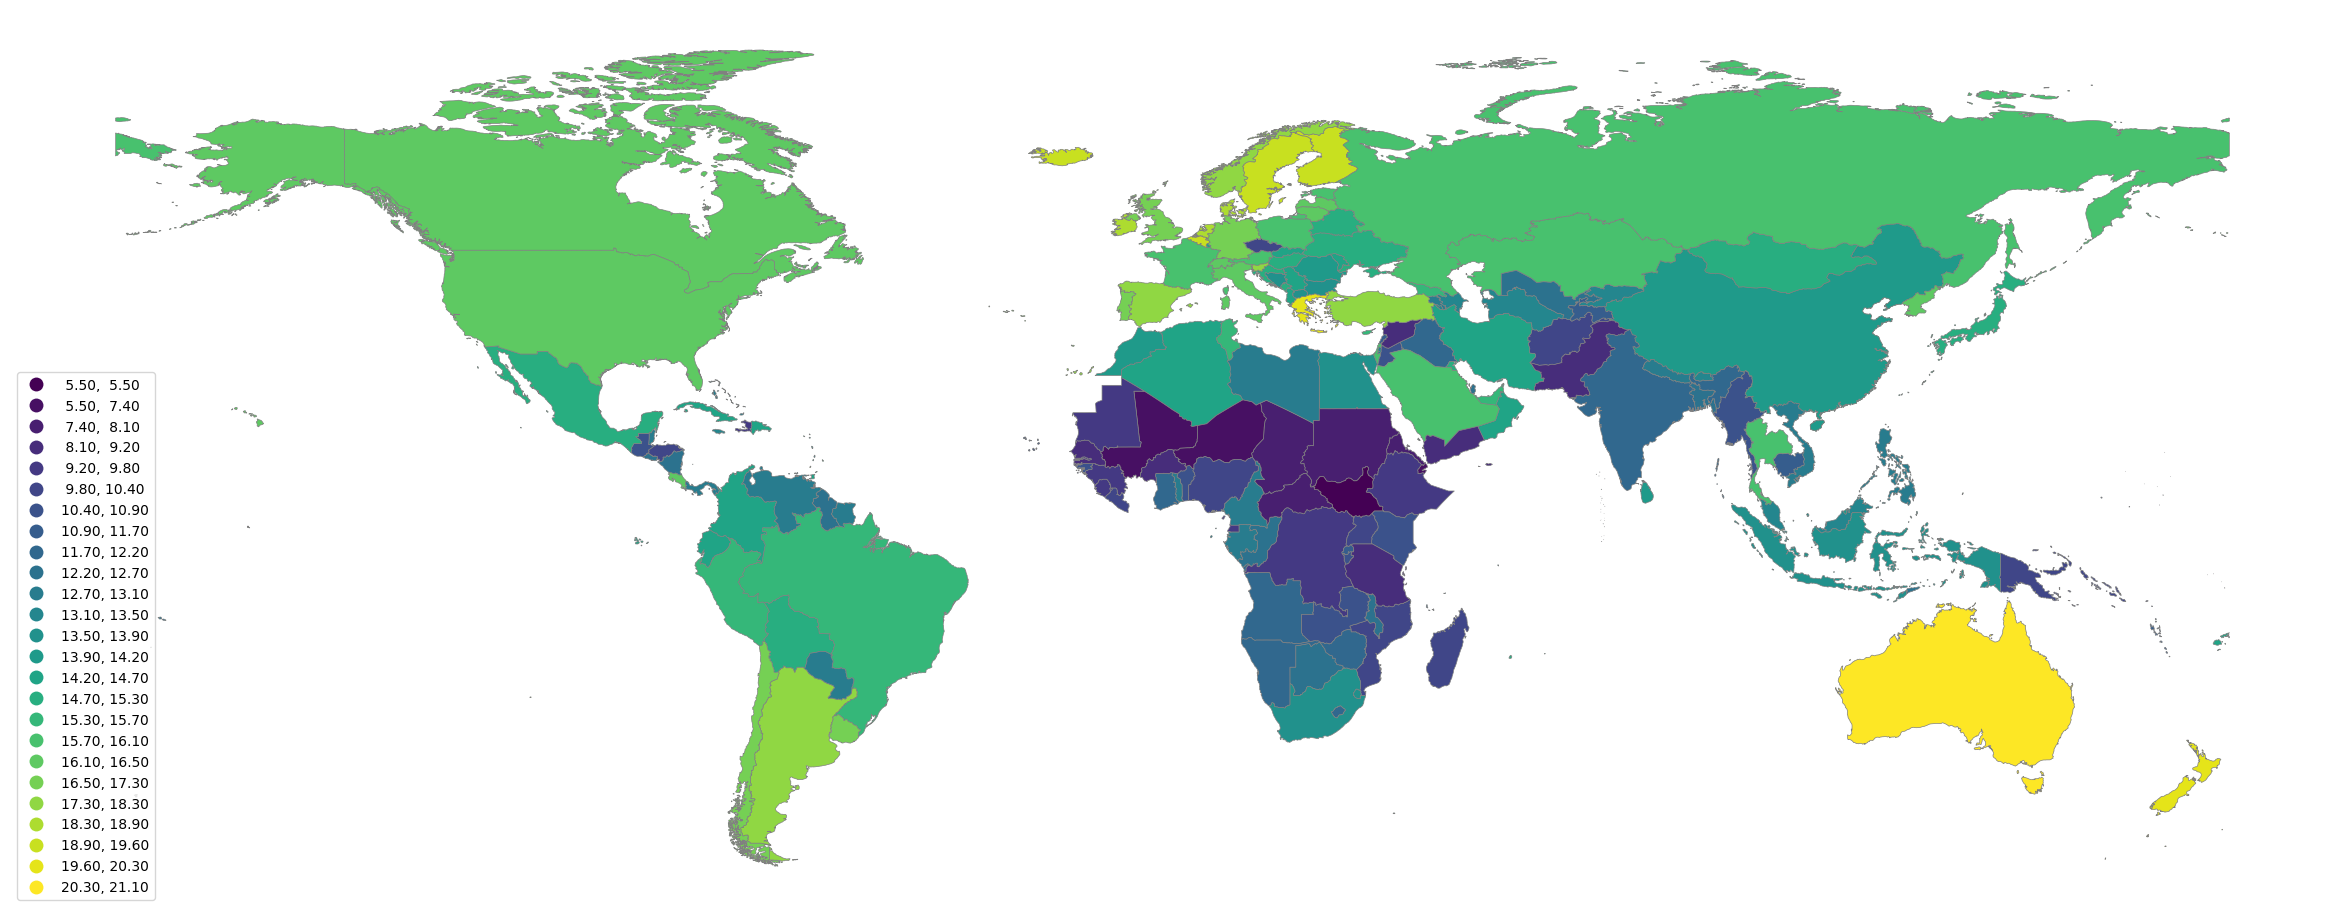

In [409]:
#cloroplething Expected years of schooling(years)
f, ax = plt.subplots(1, figsize=(30, 30))
MapAndLife.plot(column='Expected years of schooling(years)', #base variable to plot
                   cmap='viridis', #coloring options
                   scheme="fisherjenks",k=25, #clasification shceme chosen #number of intervas
        edgecolor='grey',#border color
        linewidth=0.5, #width of border
        alpha=1,# level of transparency (0 is invisible)
        legend=True,#legend
        # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

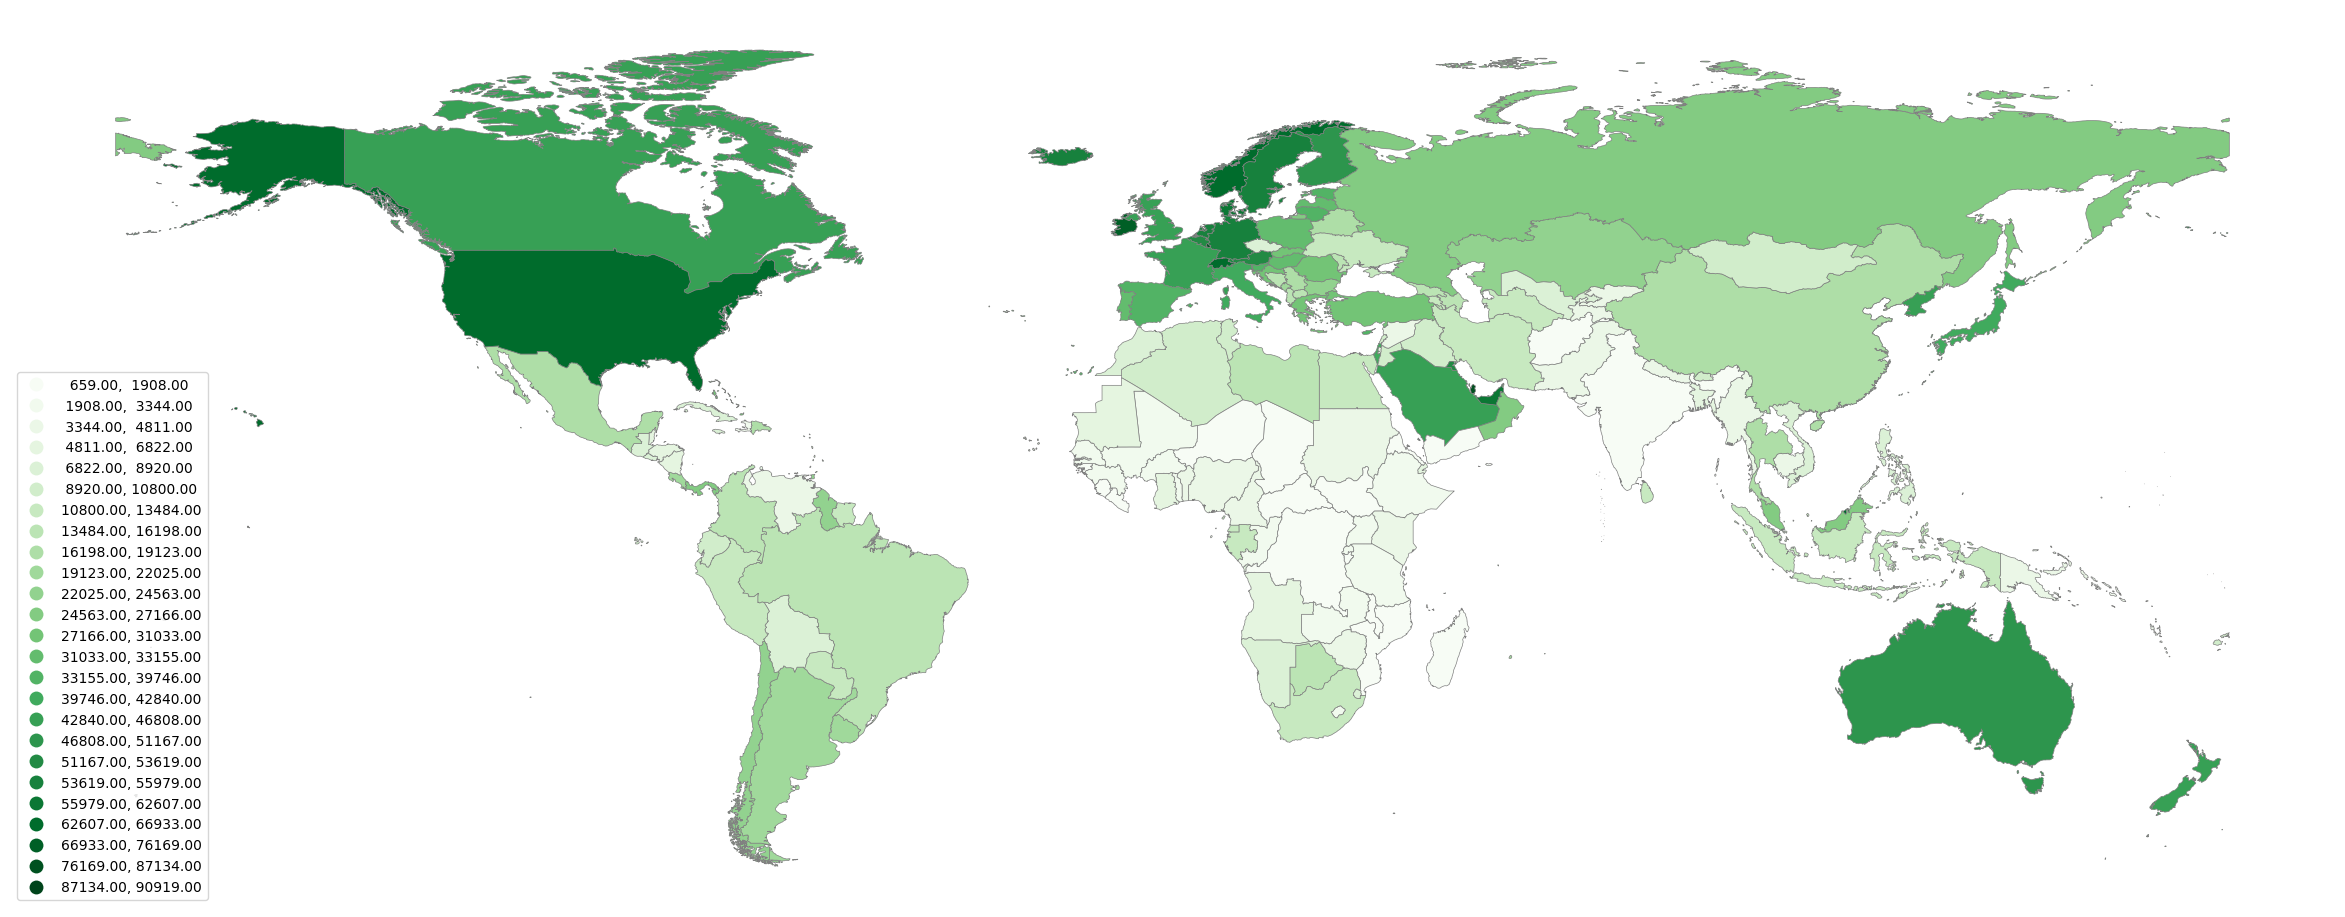

In [411]:
#cloroplething Gross national income (GNI) per capita
f, ax = plt.subplots(1, figsize=(30, 30))
MapAndLife.plot(column='Gross national income (GNI) per capita', #base variable to plot
                   cmap='Greens', #coloring options
                   scheme="fisherjenks",k=25, #clasification shceme chosen #number of intervas
        edgecolor='grey',#border color
        linewidth=0.5, #width of border
        alpha=1,# level of transparency (0 is invisible)
        legend=True,#legend
        # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()